In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Loading Dataset
df = pd.read_csv('ipl.csv')

#### EDA

In [3]:
df.shape

(76014, 15)

In [4]:
df.duplicated().sum()

0

In [5]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


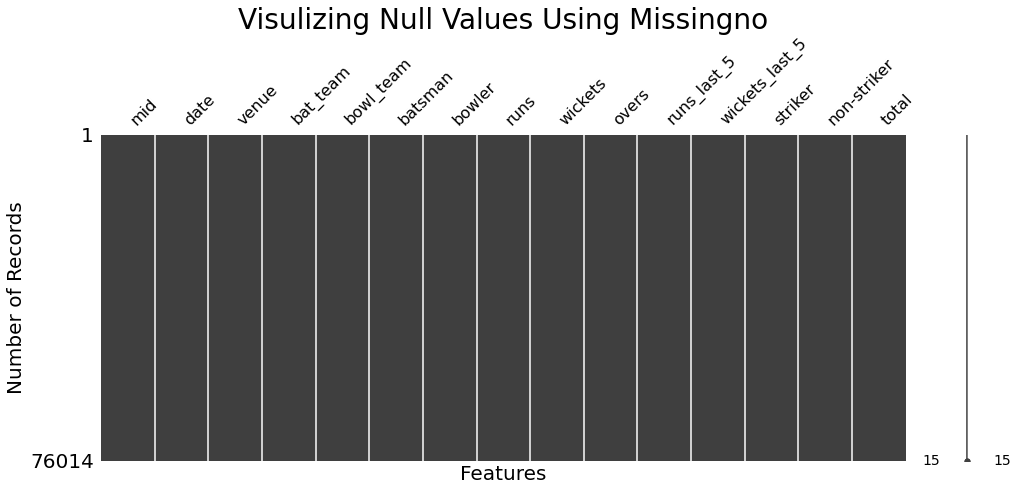

In [7]:
import missingno as mn
mn.matrix(df,figsize=(16,6))
plt.xlabel('Features',fontdict={'fontsize':20})
plt.ylabel("Number of Records",fontdict={'fontsize':20})
plt.title("Visulizing Null Values Using Missingno",fontdict={'fontsize':28});

##### Observations
* There are no null values in the data set. 

In [8]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


##### Observations
* 76014 Rows In the data.
* Average Score is 160.

In [9]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [10]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

##### Observations
* There Are Some Teams `['Pune Warriors', 'Kochi Tuskers Kerala','Rising Pune Supergiants', 'Gujarat Lions', 'Rising Pune Supergiant']` That Doesn't Play Now. So We Can Remove Them. 
* Teams Like `['Deccan Chargers','Delhi Daredevils']` changed their name to `['Sunrisers Hyderabad',
'Delhi Capitals']` So We Can Combine Records of Both By Replacing Deccan Chargers with Sunrisers Hyderabaed.

In [12]:
## Copy of data
temp = df.copy()

In [13]:
## Current Playing Teams (Till 2021 IPL Season)
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [14]:
## Replacing Old Team Names With New One's
temp['bat_team'] = temp['bat_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
temp['bowl_team'] = temp['bowl_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


temp['bat_team'] = temp['bat_team'].str.replace('Delhi Daredevils','Delhi Capitals')
temp['bowl_team'] = temp['bowl_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [15]:
temp.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [16]:
## Removing All The Teams That Doesn't Play Now
temp = temp[(temp['bat_team'].isin(teams)) & (temp['bowl_team'].isin(teams))]

In [17]:
## Checking Whether Code Worked or Not!!
temp.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

In [18]:
temp.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [19]:
df = temp

In [20]:
## Checking For Main DF
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

#### Removing First 5 Overs Data in Every Match

In [21]:
temp = df.copy()

In [22]:
df = df[df['overs']>=5.0]

In [23]:
temp.shape,df.shape

((62464, 15), (46560, 15))

In [24]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [25]:
df.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222
34,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,222


In [26]:
## Checking Unique Values In Every Columns
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values")

Column mid has 507 unique values
Column date has 392 unique values
Column venue has 32 unique values
Column bat_team has 8 unique values
Column bowl_team has 8 unique values
Column batsman has 360 unique values
Column bowler has 296 unique values
Column runs has 226 unique values
Column wickets has 11 unique values
Column overs has 105 unique values
Column runs_last_5 has 84 unique values
Column wickets_last_5 has 8 unique values
Column striker has 139 unique values
Column non-striker has 81 unique values
Column total has 132 unique values


##### Dropping Unnecessary Columns

1. Batsman : Players Gets Removed and Added In Every Match. Having Data Only For 360 Players Is Not Enough. 
2. Bowler: Less Data Contains Only 296 Bowlers.
3. mid: ID of match (Not Required For Prediction)
4. striker : Batsman on strike (Same Reason as Col batsman and bowler)
5. non-striker: Same Reason as Col batsman and bowler.
<br><br>
➡️ Date : It is also not required but we will use it to split the data based on season.

In [27]:
columns = ['mid','batsman','bowler','mid','striker','non-striker','venue']
df.drop(columns,inplace=True,axis=1)

In [28]:
df.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222


###### Venue

In [29]:
#df.venue.unique()

##### Date

In [30]:
df.date.dtype

dtype('O')

In [31]:
df.date.head()

32    2008-04-18
33    2008-04-18
34    2008-04-18
35    2008-04-18
36    2008-04-18
Name: date, dtype: object

In [32]:
df['season'] = df['date'].apply(lambda x:x.split('-')[0]).astype(int)

In [33]:
df['season']

32       2008
33       2008
34       2008
35       2008
36       2008
         ... 
75884    2017
75885    2017
75886    2017
75887    2017
75888    2017
Name: season, Length: 46560, dtype: int32

c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


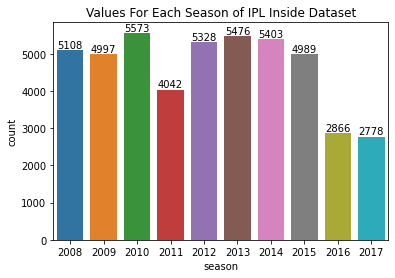

In [34]:
import seaborn as sns
ax = sns.countplot(df['season'])
ax.bar_label(ax.containers[0]);
plt.title('Values For Each Season of IPL Inside Dataset');

In [35]:
df.drop('date',inplace=True,axis=1)

In [36]:
## Average Score By Each Team
pd.DataFrame(df.groupby(['bat_team'])['total'].mean())

,total
bat_team,
Chennai Super Kings,166.725192
Delhi Capitals,154.928841
Kings XI Punjab,162.888275
Kolkata Knight Riders,158.527417
Mumbai Indians,164.426123
Rajasthan Royals,158.831169
Royal Challengers Bangalore,163.140015
Sunrisers Hyderabad,161.575327


In [37]:
## One Hot Encoding
df = pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [38]:
df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,season,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,222,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,222,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,222,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,222,2008,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Correlation

In [39]:
df.season

32       2008
33       2008
34       2008
35       2008
36       2008
         ... 
75884    2017
75885    2017
75886    2017
75887    2017
75888    2017
Name: season, Length: 46560, dtype: int32

In [40]:
# ## Splliting Data
# X_train = df[df['season']<=2015]
# X_train = X_train.drop(['total','season'],axis=1)

# y_train = df[df['season']<=2015]
# y_train = y_train['total']

# X_test = df[df['season']>2015]
# X_test = X_test.drop(['total','season'],axis=1)

# y_test = df[df['season']>2015]
# y_test = y_test['total']

In [41]:
## Shuffling Dataset
df = df.sample(df.shape[0])

## Splitting Using Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(['total','season'],axis=1)
y = df['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# from sklearn.model_selection import KFold 
# kf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=None) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index] 
#       y_train, y_test = y[train_index], y[test_index]

In [42]:
X_train.shape

(32592, 21)

In [43]:
y_train.head()

32033    196
52202    157
21517     95
14185    190
12414    150
Name: total, dtype: int64

In [44]:
X_test.shape

(13968, 21)

In [45]:
y_test.head()

28635    133
45631    183
18540    184
58678    134
7902     168
Name: total, dtype: int64

In [46]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32033,70,0,7.6,38,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
52202,69,1,9.3,43,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
21517,79,4,13.3,35,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14185,139,2,16.1,41,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
12414,88,2,13.4,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

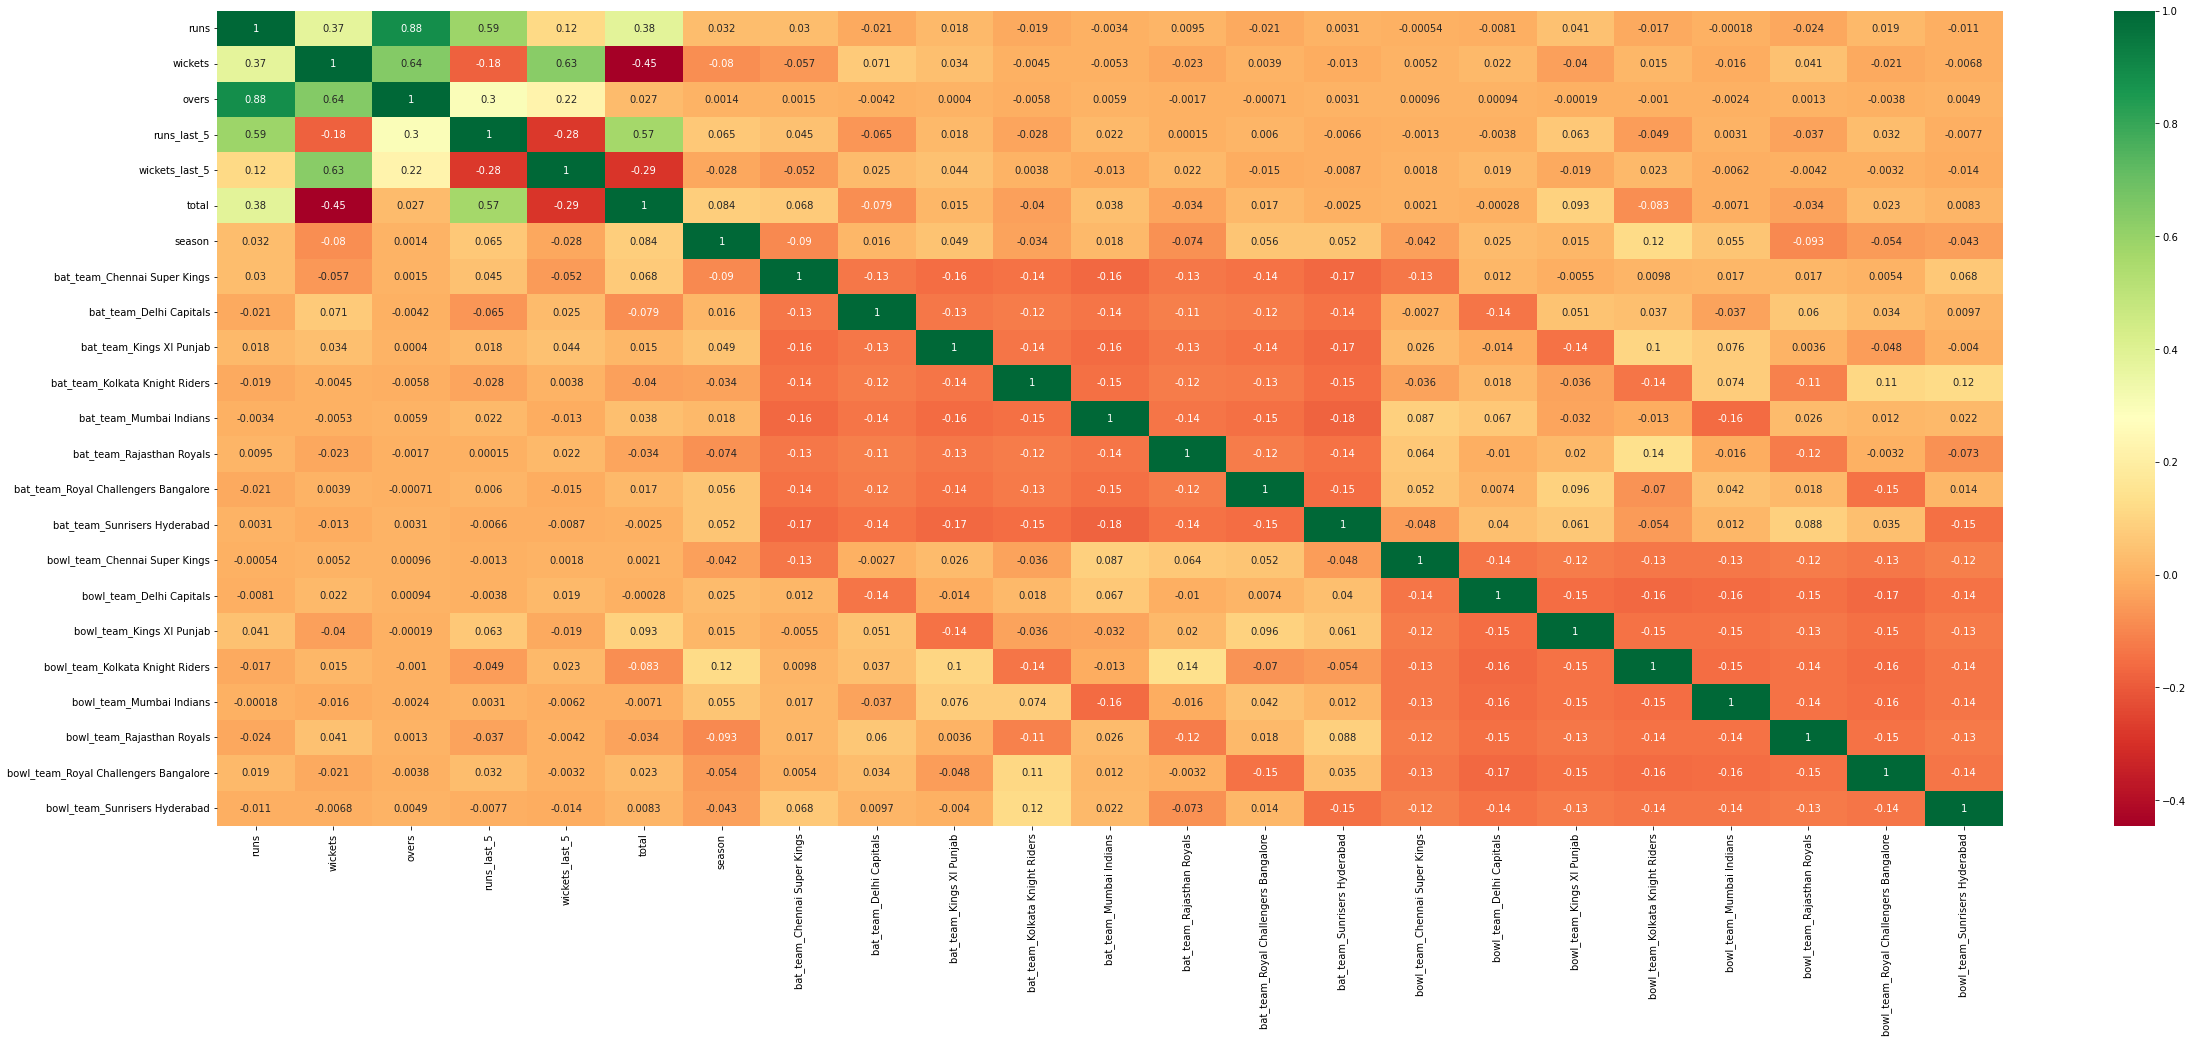

In [47]:
corrmat = df.corr()
plt.figure(figsize=(40,15))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

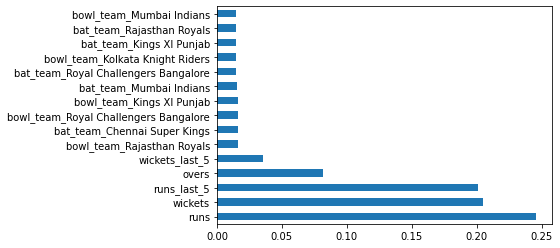

In [48]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## MODEL TRAINING

Training Model With Base Parameters

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [50]:
r2_scores = {}
mae = {}

Predictions:
 [149.55673628 162.24592556 148.43320255 ... 156.52795474 152.55205591
 200.4163627 ]


r2 score on Training Data 0.653627924314379
r2 score Test Data is: 0.6465824196927763


MAE:12.881126854646313
MSE:294.9878717676209
RMSE:17.175210967193994


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

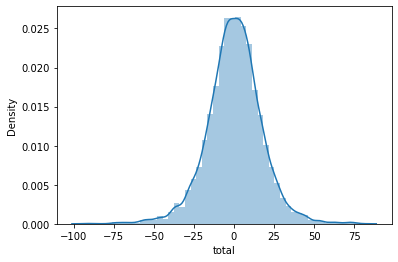

In [51]:
######### LINEAR REGRESSION ###########
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)
print("Predictions:\n",predictions)

print('\n')
print('r2 score on Training Data {}'.format(r2_score(y_train,lr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test,predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

r2_scores['Linear Regression'] = r2_score(y_test,predictions)
mae['Linear Regression']  =   mean_absolute_error(y_test,predictions)

sns.distplot(y_test-predictions)

Predictions:
 [168.67164179 160.90951511 160.90951511 ... 164.48712021 151.59069767
 160.33954355]


r2 score on Training Data 0.13300396575835471
r2 score Test Data is: 0.1268280521172669


MAE:21.106797960402304
MSE:728.8124557052511
RMSE:26.996526734105093


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

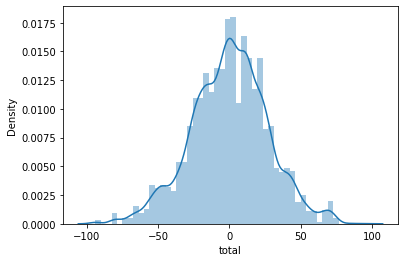

In [52]:
########## DECISION TREES ########
from sklearn.tree import DecisionTreeRegressor
dtr =  DecisionTreeRegressor(max_depth=5,max_features=3,random_state=42)
dtr.fit(X_train,y_train)

predictions = dtr.predict(X_test)
print("Predictions:\n",predictions)

print('\n')
print('r2 score on Training Data {}'.format(r2_score(y_train,dtr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test,predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

r2_scores['DecisionTreeRegressor'] = r2_score(y_test,predictions)
mae['DecisionTreeRegressor']  =   mean_absolute_error(y_test,predictions)

     
sns.distplot(y_test-predictions)

Predictions:
 [150.98697366 166.28173546 182.43004673 ... 170.92628801 143.60155234
 199.41664016]


r2 score on Training Data 0.9357524685500277
r2 score Test Data is: 0.876852136526447


MAE:6.895676011024922
MSE:102.7881129377152
RMSE:10.138447264631562


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

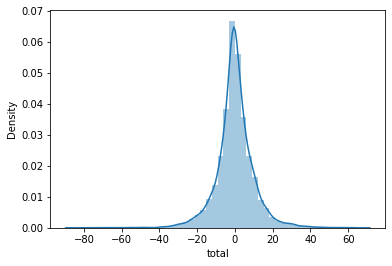

In [75]:
########## RANDOM FOREST  ########
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(random_state=42,max_depth=15,n_estimators=100,max_features='auto',min_samples_split=5)
rf.fit(X_train,y_train)

predictions = rf.predict(X_test)
print("Predictions:\n",predictions)

print('\n')
print('r2 score on Training Data {}'.format(r2_score(y_train,rf.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test,predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

r2_scores['RandomForestRegressor'] = r2_score(y_test,predictions)
mae['RandomForestRegressor']  =   mean_absolute_error(y_test,predictions)

     
sns.distplot(y_test-predictions)

Predictions:
 [159.87507942 164.50962703 182.17916382 ... 165.31316672 145.07804552
 202.48404164]


r2 score on Training Data 0.9149096398691647
r2 score Test Data is: 0.87627029089923


MAE:7.094363408531241
MSE:103.2737633774042
RMSE:10.162369968536089


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

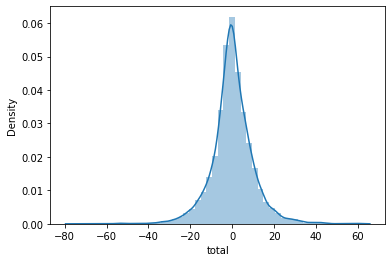

In [73]:
######### EXTRA TREE REGRESSOR ########
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(max_depth=15,n_estimators=100,max_features='auto',min_samples_split=5)
etr.fit(X_train,y_train)

predictions = etr.predict(X_test)
print("Predictions:\n",predictions)

print('\n')
print('r2 score on Training Data {}'.format(r2_score(y_train,etr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test,predictions)))
print('\n')

print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

r2_scores['ExtraTreesRegressor'] = r2_score(y_test,predictions)
mae['ExtraTreesRegressor']  =   mean_absolute_error(y_test,predictions)

  
sns.distplot(y_test-predictions)

Predictions:
 [157.91949575 161.10002065 142.04209817 ... 154.35630847 150.18085268
 190.42045322]


r2 score on Training Data 0.6824888206579456
r2 score Test Data is: 0.6649363201969398


MAE:12.493183745664695
MSE:279.66837904840946
RMSE:16.72328852374465


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

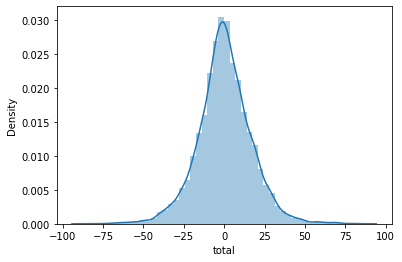

In [59]:
################### GradientBoostingRegressor ###############
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

predictions = gbr.predict(X_test)
print("Predictions:\n",predictions)

print('\n')
print('r2 score on Training Data {}'.format(r2_score(y_train,gbr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test,predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))


r2_scores['GradientBoostingRegressor'] = r2_score(y_test,predictions)
mae['GradientBoostingRegressor']  =   mean_absolute_error(y_test,predictions)

     
sns.distplot(y_test-predictions)

Predictions:
 [141.7618  161.54855 174.0442  ... 172.1909  148.46637 203.51057]


r2 score on Training Data 0.8724597952421042
r2 score Test Data is: 0.8304598736215443


MAE:8.613419666323056
MSE:141.51045065760104
RMSE:11.895816519163409


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

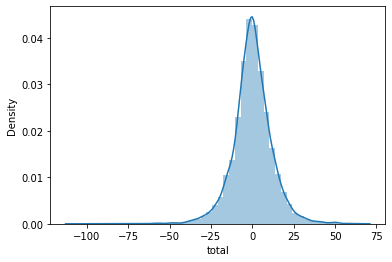

In [70]:
################### XGBRegressor ###############
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

predictions = xgb.predict(X_test)
print("Predictions:\n",predictions)

print('\n')
print('r2 score on Training Data {}'.format(r2_score(y_train,xgb.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test,predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

r2_scores['XGBRegressor'] = r2_score(y_test,predictions)
mae['XGBRegressor']  =   mean_absolute_error(y_test,predictions)



sns.distplot(y_test-predictions)

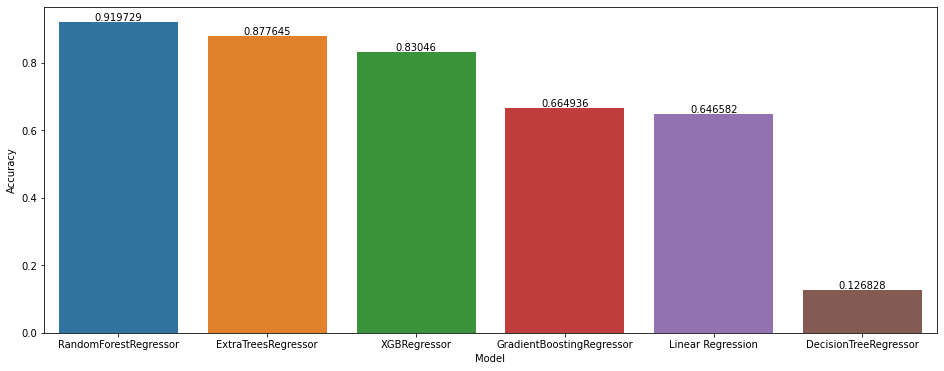

In [71]:
## Comparing Different R2 Scores
plt.figure(figsize=(16,6))
scores = pd.DataFrame(r2_scores.items(),columns=['Model', 'Accuracy'])
ax = sns.barplot(data=scores.sort_values("Accuracy", ascending = False),x='Model',y='Accuracy')
ax.bar_label(ax.containers[0]);

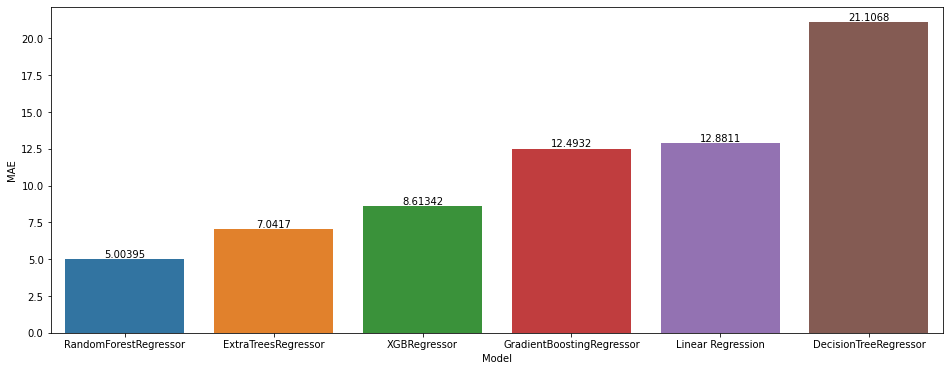

In [72]:
## Comparing Different MAE
plt.figure(figsize=(16,6))
scores = pd.DataFrame(mae.items(),columns=['Model', 'MAE'])
ax = sns.barplot(data=scores.sort_values("MAE", ascending = True),x='Model',y='MAE')
ax.bar_label(ax.containers[0]);

So Linear Regression Gives Least MAE with Highest Accuracy.

In [63]:
pd.set_option('display.max_columns',2000)
X_test.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
28635,65,2,11.2,39,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45631,53,2,7.4,37,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
18540,77,4,11.5,24,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
58678,99,5,14.6,26,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7902,82,1,9.1,45,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


### Predicting On New Situations

In [76]:
# Actual 147
data = [68, 3, 10.2, 29, 0, 1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

[144.88711338]
Final Score Will Be Between 139 and 149


In [77]:
## Actual 160
data = [100, 3, 13.1, 42, 2, 0,0,0,0,0,1,0,0, 0,0,0,1,0,0,0,0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

[163.06964797]
Final Score Will Be Between 158 and 168


In [68]:
## Actual 202
data = [180, 2, 18, 70, 1, 1,0,0,0,0,1,0,0, 0,0,0,1,0,0,0,0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

[201.94213094]
Final Score Will Be Between 196 and 206


In [79]:
import pickle
file_name = 'predict_ipl_1st_innings_score_etr.pkl'
pickle.dump(etr , open(file_name,'wb'))

In [128]:
loaded_model = pickle.load(open("predict_ipl_1st_innings_score_etr.pkl", "rb"))
pred = loaded_model.predict(X_test)
print(r2_score(y_test,pred))
print('MAE:{}'.format(mean_absolute_error(y_test,pred)))
print('MSE:{}'.format(mean_squared_error(y_test,pred)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,pred))))

0.9532968577616543
MAE:2.941888244558992
MSE:39.47997925436712
RMSE:6.283309578109861
